Loading Real Image Data

So far we've only worked with toy datasets (MNIST, CIFAR-10) conveniently packaged by torchvision, where every image has the same size and shape. Now let's learn the real deal, and work from a varied collection of .jpg files.
For this section we'll be working with a version of the Cats vs. Dogs dataset inspired by a classic Kaggle competition.

We have organized the files into train and test folders, and further divided the images into CAT and DOG subfolders.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We'll us Python's built-in os module to walk the directories collecting file names. We'll then use Pillow, an extension to the Python Imaging Library (PIL), to open image files and extract image sizes. A pandas DataFrame will provide summary statistics on our data like max/min width & height from which we can choose our model parameters.

In [4]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

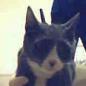

In [6]:
# CHECK THE FULL FILE PATH
with Image.open('/Users/elifseven/Desktop/PytorchUdemy/togitfiles/Deep-Learning-Tensorflow-Python/Pytorch-Tensor/pytorch-datasets/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [8]:
path = '/Users/elifseven/Desktop/PytorchUdemy/togitfiles/Deep-Learning-Tensorflow-Python/Pytorch-Tensor/pytorch-datasets/CATS_DOGS/'
img_names = []

for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [10]:
len(img_names)

24994

In [12]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    except:
        rejected.append(item)


In [16]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [18]:
df = pd.DataFrame(img_sizes)

In [21]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [22]:
dog  = Image.open('/Users/elifseven/Desktop/PytorchUdemy/togitfiles/Deep-Learning-Tensorflow-Python/Pytorch-Tensor/pytorch-datasets/CATS_DOGS/train/DOG/14.jpg')

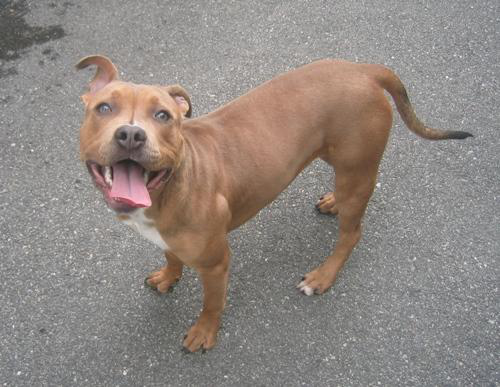

In [24]:
display(dog)

In [26]:
dog.size

(500, 387)

In [28]:
dog.getpixel((0,0)) # 0 -- 255 

(90, 95, 98)

In [32]:
# this image jpeg, so we need tensor object
# compose can then take in a list of transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

# opens that JPEG image file, and transforms it into Pytorch tensor
# 3: 3 color channel

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


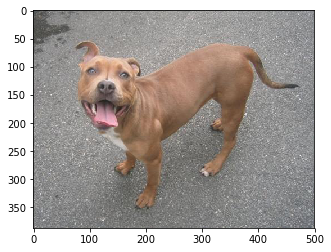

In [33]:
# (387,500,3)
# (1,2,0) --> I need to essentially transpose or reshape this so its 1 2 0
# 0 index: 500, 2: 387 item, 
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [35]:
im[:0,0]

tensor([], size=(0, 500))

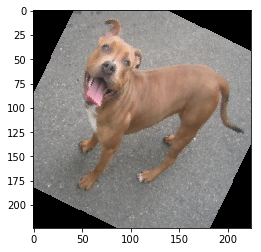

In [45]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(30),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


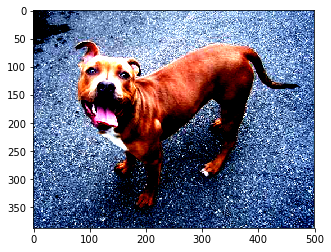

In [51]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

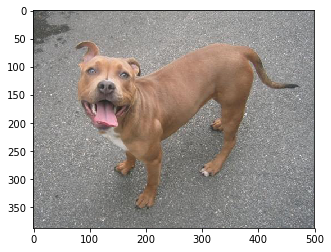

In [52]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));